In [13]:
import numpy as np
from scipy.optimize import differential_evolution

def michalewicz_function_with_noise(x):
   
    x1, x2 = x  # Unpack the single iterable argument
    
    x1 = x1 * np.pi
    x2 = x2 * np.pi
    
    m = 10
    
    out1 = np.sin(x1) * (np.sin((x1**2) / np.pi))**(2 * m)
    out2 = np.sin(x2) * (np.sin((2 * x2**2) / np.pi))**(2 * m)
    noise = np.random.normal(0, 0.1)
    return - (out1 + out2 + noise) * 0.75  # negative sign for maximization

bounds = [(0, 1), (0, 1)]  # x1 and x2 are between 0 and 1
result = differential_evolution(michalewicz_function_with_noise, bounds)

print('Optimum point:', result.x)
print('Function value at optimum point:', - result.fun)  # negative sign to correct for maximization


Optimum point: [0.70272663 0.49696603]
Function value at optimum point: 1.640084744614371


In [21]:
import numpy as np
from scipy.optimize import differential_evolution

# Corrected function definition to accept a single array argument
def michalewicz_function_with_noise(x, m=10):
    x1, x2 = x  # Unpack the array into x1 and x2
    x1 = x1 * np.pi
    x2 = x2 * np.pi
    
    # Calculate the Michalewicz function components
    term1 = np.sin(x1) * (np.sin(x1 ** 2 / np.pi)) ** (2 * m)
    term2 = np.sin(x2) * (np.sin(2 * x2 ** 2 / np.pi)) ** (2 * m)
    
    # Add noise
    noise = np.random.normal(0, 0.1)
    
    # Return the negated function value (since differential_evolution minimizes)
    return -(term1 + term2 + noise) * 0.75

# Define bounds for x1 and x2
bounds = [(0, 1), (0, 1)]

# Use differential_evolution to find the global optimum
result = differential_evolution(michalewicz_function_with_noise, bounds)

print('Optimum point:', result.x)
print('Function value at optimum point:', -result.fun)  # Negate to correct for maximization


Optimum point: [0.69969819 0.50700154]
Function value at optimum point: 1.6461266090583155


In [10]:
import numpy as np
from scipy.optimize import differential_evolution

# Corrected function definition
def michalewicz_function_with_noise(x):
    m = 10
    x1, x2 = x  # Unpack the single iterable argument
    x1 = x1 * np.pi
    x2 = x2 * np.pi
    
    out1 = np.sin(x1) * (np.sin((x1**2) / np.pi))**(2 * m)
    out2 = np.sin(x2) * (np.sin((2 * x2**2) / np.pi))**(2 * m)
    noise = np.random.normal(0, 0.1)
    return -(out1 + out2 + noise) * 0.75  # Use the negative sign for maximization

bounds = [(0, 1), (0, 1)]  # x1 and x2 are between 0 and 1
result = differential_evolution(michalewicz_function_with_noise, bounds)

print('Optimum point:', result.x)
print('Function value at optimum point:', -result.fun)  # Use the negative sign to correct for maximization


Optimum point: [0.70061662 0.49838217]
Function value at optimum point: 1.6290148352325633


In [28]:
from scipy.optimize import differential_evolution
import numpy as np

# Define the Michalewicz function without noise for optimization
def michalewicz_function(x):
    m = 10
    x1, x2 = x
    x1 = x1 * np.pi
    x2 = x2 * np.pi
    term1 = np.sin(x1) * (np.sin((x1**2) / np.pi))**(2 * m)
    term2 = np.sin(x2) * (np.sin((2 * x2**2) / np.pi))**(2 * m)
    return -(term1 + term2) * 0.75  # Negate for maximization

# Set the bounds for x1 and x2
bounds = [(0, 1), (0, 1)]

# Initialize arrays to store the results
opt_results = []

# Run the optimization 1000 times
for _ in range(1000):
    result = differential_evolution(michalewicz_function, bounds)
    opt_results.append((result.x, -result.fun))  # Store points and negated function values for maximization

# Sort the results by the function values in descending order
opt_results_sorted = sorted(opt_results, key=lambda x: x[1], reverse=True)

# Extract the sorted points and values
sorted_points = np.array([result[0] for result in opt_results_sorted])
sorted_values = np.array([result[1] for result in opt_results_sorted])

# Calculate the average point and value
avg_point = np.mean(sorted_points, axis=0)
avg_value = np.mean(sorted_values)

# Print each point with its corresponding function value
for point, value in opt_results_sorted:
    print(f"Point: {point}, Function Value: {value}")

# Output the average point and value
print("\nAverage Point:", avg_point)
print("Average Function Value:", avg_value)




Point: [0.70120661 0.5       ], Function Value: 1.3509775575739145
Point: [0.7012066 0.5      ], Function Value: 1.3509775575739145
Point: [0.70120661 0.5       ], Function Value: 1.3509775575739145
Point: [0.7012066 0.5      ], Function Value: 1.3509775575739142
Point: [0.7012066 0.5      ], Function Value: 1.3509775575739142
Point: [0.70120661 0.5       ], Function Value: 1.350977557573914
Point: [0.7012066 0.5      ], Function Value: 1.350977557573914
Point: [0.7012066 0.5      ], Function Value: 1.350977557573914
Point: [0.7012066 0.5      ], Function Value: 1.350977557573914
Point: [0.7012066 0.5      ], Function Value: 1.3509775575739131
Point: [0.70120661 0.5       ], Function Value: 1.3509775575739131
Point: [0.7012066 0.5      ], Function Value: 1.3509775575739131
Point: [0.7012066 0.5      ], Function Value: 1.3509775575739131
Point: [0.70120661 0.5       ], Function Value: 1.350977557573913
Point: [0.70120661 0.5       ], Function Value: 1.350977557573913
Point: [0.7012066 0

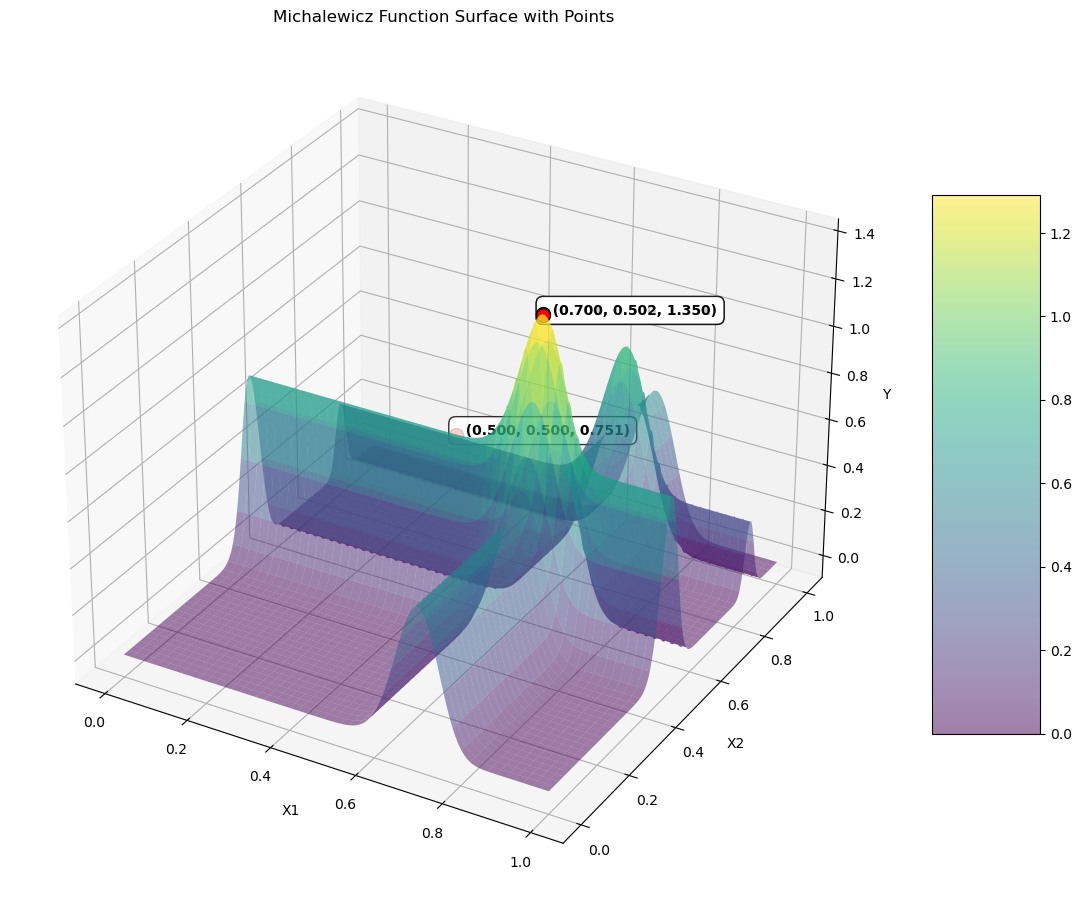

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def michalewicz_function(x, y, m=10):
    x1 = x * np.pi
    x2 = y * np.pi
    term1 = np.sin(x1) * (np.sin((x1 ** 2) / np.pi)) ** (2 * m)
    term2 = np.sin(x2) * (np.sin((2 * x2 ** 2) / np.pi)) ** (2 * m)
    return (term1 + term2) * 0.75  # Negate for maximization

# Points and their Michalewicz function values
points_and_values = np.array([
    [0.500000, 0.500000, michalewicz_function(0.500000, 0.500000)],
    [0.701207, 0.500000, michalewicz_function(0.701207, 0.500000)],
    [0.700162, 0.501762, michalewicz_function(0.700162, 0.501762)]
])


# Create a grid of points
x = np.linspace(0, 1, 500)
y = np.linspace(0, 1, 500)
X, Y = np.meshgrid(x, y)
Z = michalewicz_function(X, Y, m=10)

# Plotting the surface and points
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.5)

# Plot and annotate the points with larger, bolder text and a white background for better visibility
for point in points_and_values:
    ax.scatter(point[0], point[1], point[2], color='red', s=100, edgecolors='black', alpha=1.0)  # Solid point
    annotation = ax.text(point[0], point[1], point[2], f'  ({point[0]:.3f}, {point[1]:.3f}, {point[2]:.3f})',
                         size=10, color='black', weight='bold', 
                         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'))

ax.set_title('Michalewicz Function Surface with Points')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


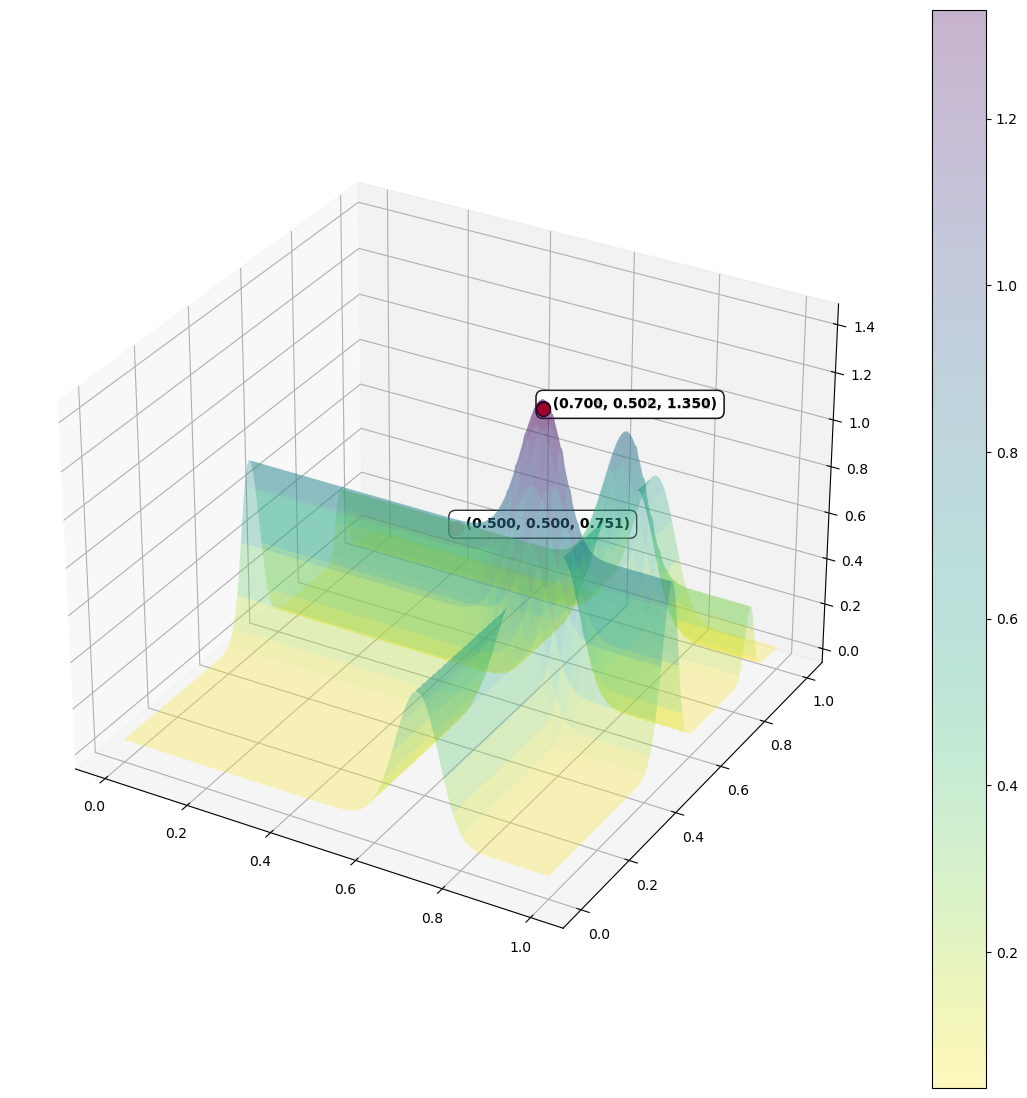

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def michalewicz_function_with_noise(x, y):
    m=10
    x1 = x * np.pi
    x2 = y * np.pi
    term1 = np.sin(x1) * (np.sin((x1 ** 2) / np.pi)) ** (2 * m)
    term2 = np.sin(x2) * (np.sin((2 * x2 ** 2) / np.pi)) ** (2 * m)
    noise = np.random.normal(0, 0.1)
    return (term1 + term2 + noise) * 0.75  # negative sign for maximization

# Points and their Michalewicz function values
points_and_values = np.array([
    [0.500000, 0.500000, michalewicz_function(0.500000, 0.500000)],
    [0.701207, 0.500000, michalewicz_function(0.701207, 0.500000)],
    [0.700162, 0.501762, michalewicz_function(0.700162, 0.501762)]
])

# Create a grid of points
x = np.linspace(0, 1, 400)
y = np.linspace(0, 1, 400)
X, Y = np.meshgrid(x, y)
Z = michalewicz_function_with_noise(X, Y)

# Plot the surface
fig = plt.figure(figsize=(14, 14)) 
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis_r', edgecolor='none', alpha=0.3)  # Set surface transparency

# Plot and annotate the points with larger, bolder text and a white background for better visibility
for point in points_and_values:
    ax.scatter(point[0], point[1], point[2], color='red', s=100, edgecolors='black', alpha=1.0)  # Solid point
    annotation = ax.text(point[0], point[1], point[2], f'  ({point[0]:.3f}, {point[1]:.3f}, {point[2]:.3f})',
                         size=10, color='black', weight='bold', 
                         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'))

# Add a color bar
fig.colorbar(surf)

# Show the plot
plt.show()


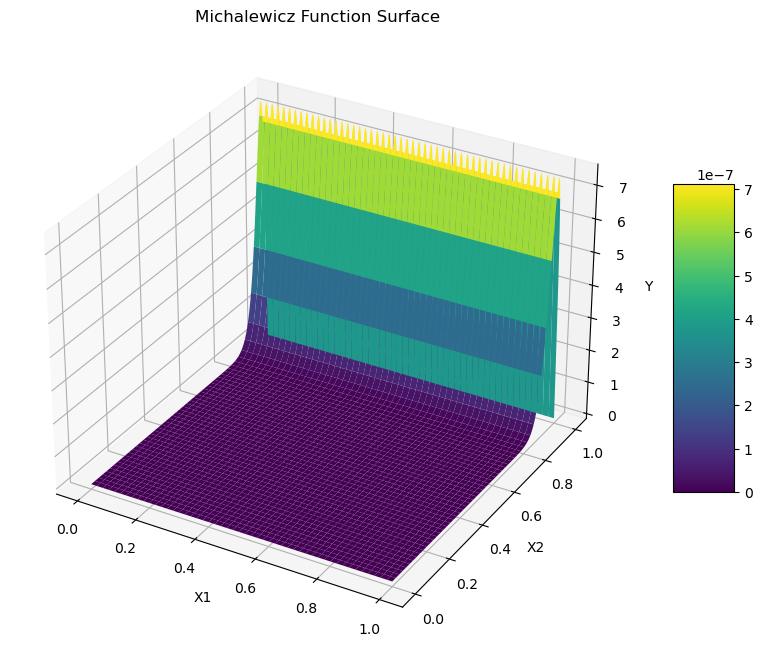

In [103]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the original Michalewicz function for visualization purposes (without noise)
def michalewicz_function(X, Y):
    m = 10
    term1 = np.sin(X * np.pi) * (np.sin(X ** 2 / np.pi)) ** (2 * m)
    term2 = np.sin(Y * np.pi) * (np.sin(2 * Y ** 2 / np.pi)) ** (2 * m)
    return (term1 + term2) * 0.75

# Create a meshgrid for plotting
x = np.linspace(0, 1, 400)
y = np.linspace(0, 1, 400)
X, Y = np.meshgrid(x, y)
Z = michalewicz_function(X, Y)

# Plot the surface
fig = plt.figure(figsize=(12, 8))  # Specify the figure size to make it bigger
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('Michalewicz Function Surface')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
fig.colorbar(surf, shrink=0.5, aspect=5)  # Add a color bar which maps values to colors

plt.show()


In [9]:
# Sample input for the function
x_1 = [0.5, 0.5]

# Call the michalewicz_function with the sample input
print( michalewicz_function(x_1))

x_2= [0.70120661, 0.5]

print( michalewicz_function(x_2))
# Print the output
#print('Function value:', function_value)

-0.750732421875
-1.3509775575739122


In [10]:
noise = -(0.1* 0.75)  # negative sign for maximization

In [11]:
print( michalewicz_function(x_1)+noise)
print( michalewicz_function(x_2)+ noise)

-0.825732421875
-1.4259775575739122


In [14]:
print( michalewicz_function_with_noise(x_1))
print( michalewicz_function_with_noise(x_2))

-0.929597198422002
-1.3422400439019362


In [89]:
import numpy as np
import pyswarms as ps

def michalewicz_function_with_noise_arr(x):
    m = 10
    # x[:, 0] selects all rows for the first column (x1)
    # x[:, 1] selects all rows for the second column (x2)
    x1, x2 = x[:, 0] * np.pi, x[:, 1] * np.pi
    term1 = np.sin(x1) * (np.sin(x1 ** 2 / np.pi)) ** (2 * m)
    term2 = np.sin(x2) * (np.sin(2 * x2 ** 2 / np.pi)) ** (2 * m)
    noise = np.random.normal(0, 0.1, x.shape[0])  # Generate noise for each particle
    return -(term1 + term2 + noise) * 0.75  # Return a negative value for minimization

# Setup optimizer
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options, bounds=(np.zeros(2), np.ones(2))) # for minimisation

# Perform optimization
cost, pos = optimizer.optimize(michalewicz_function_with_noise_arr, iters=100)

print("Optimal Cost:", -cost)
print("Optimal Position:", pos)




2024-04-05 10:10:28,300 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-1.58
2024-04-05 10:10:28,446 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -1.5796127977974836, best pos: [0.68279712 0.49809915]


Optimal Cost: 1.5796127977974836
Optimal Position: [0.68279712 0.49809915]


In [32]:
from deap import base, creator, tools, algorithms
import numpy as np

# Define the Michalewicz function with noise for optimization
def michalewicz_function_with_noise_tuple(individual):
    m = 10
    x1, x2 = individual
    x1 = x1 * np.pi
    x2 = x2 * np.pi
    term1 = np.sin(x1) * (np.sin(x1**2 / np.pi))**(2 * m)
    term2 = np.sin(x2) * (np.sin(2 * x2**2 / np.pi))**(2 * m)
    noise = np.random.normal(0, 0.1)
    # Ensure the returned value is a tuple
    return -(term1 + term2 + noise) * 0.75,  # Note the comma here

# Setup DEAP for optimization
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", michalewicz_function_with_noise_tuple)
toolbox.register("mate", tools.cxBlend, alpha=0.1)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create a population and evolve
population = toolbox.population(n=300)
NGEN = 100
CXPB, MUTPB = 0.5, 0.2

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

top10 = tools.selBest(population, k=10)

# Print the top 10 individuals and their fitness values
for i, ind in enumerate(top10, start=1):
    print(f"Individual {i}: {ind}, Fitness: {ind.fitness.values[0]}")

Individual 1: [0.6993455235880455, 0.49910533654254563], Fitness: -1.5973913258509989
Individual 2: [0.6993455235880455, 0.49910533654254563], Fitness: -1.5973913258509989
Individual 3: [0.699375587139737, 0.4987710951050439], Fitness: -1.5557218053533153
Individual 4: [0.699375587139737, 0.4987710951050439], Fitness: -1.5557218053533153
Individual 5: [0.6996865870923024, 0.4986999323676278], Fitness: -1.5448655003019764
Individual 6: [0.6996865870923024, 0.4986999323676278], Fitness: -1.5448655003019764
Individual 7: [0.6997032365334042, 0.4988855899492893], Fitness: -1.5287822470136607
Individual 8: [0.6997032365334042, 0.4988855899492893], Fitness: -1.5287822470136607
Individual 9: [0.6997032365334042, 0.4988855899492893], Fitness: -1.5287822470136607
Individual 10: [0.6997032365334042, 0.4988855899492893], Fitness: -1.5287822470136607


In [81]:
import numpy as np

# Define the objective function
def michalewicz_function_with_noise(X):
    m = 10
    term1 = np.sin(X[0] * np.pi) * (np.sin(X[0] ** 2 / np.pi)) ** (2 * m)
    term2 = np.sin(X[1] * np.pi) * (np.sin(2 * X[1] ** 2 / np.pi)) ** (2 * m)
    noise = np.random.normal(0, 0.1)
    return -(term1 + term2 + noise) * 0.75  # Negate for maximization

# Pattern Search algorithm with bounds
def pattern_search(func, x0, step=0.1, no_improve_thr=10e-6, max_iter=100, bounds=[(0, 1), (0, 1)]):
    x = np.array(x0)
    best_score = func(x)
    history = [x]
    no_improve_count = 0

    for i in range(max_iter):
        # Explore the surrounding space
        for dx in [-step, step]:
            for dy in [-step, step]:
                x_try = np.array([x[0] + dx, x[1] + dy])
                # Enforce bounds
                if x_try[0] < bounds[0][0] or x_try[0] > bounds[0][1]:
                    continue
                if x_try[1] < bounds[1][0] or x_try[1] > bounds[1][1]:
                    continue
                score_try = func(x_try)
                # Check if there is an improvement
                if score_try < best_score:
                    best_score = score_try
                    x = x_try
                    history.append(x)
                    no_improve_count = 0
                    break  # If we find an improvement, don't try other directions
            else:
                continue
            break
        else:
            # If no improvement, reduce the step size
            no_improve_count += 1
            if no_improve_count > no_improve_thr:
                step *= 0.9
                no_improve_count = 0
        
        # Early stopping if the step size becomes too small
        if step < 1e-6:
            break
            
    return best_score, x, history

# Initial guess within bounds
x0 = np.random.rand(2)

# Perform Pattern Search
best_score, best_x, history = pattern_search(michalewicz_function_with_noise, x0)

print(f"Best score (minimum function value): {-best_score}")
print(f"Best position (global optimum): {best_x}")


Best score (minimum function value): 0.21365063640467175
Best position (global optimum): [0.82067856 0.68975632]


In [84]:
import numpy as np

def michalewicz_function_with_noise(X):
    m = 10
    term1 = np.sin(X[0] * np.pi) * (np.sin(X[0] ** 2 / np.pi)) ** (2 * m)
    term2 = np.sin(X[1] * np.pi) * (np.sin(2 * X[1] ** 2 / np.pi)) ** (2 * m)
    noise = np.random.normal(0, 0.1)
    return -(term1 + term2 + noise) * 0.75

def pattern_search(func, x0, bounds, max_iter=1000, step_size=0.1, stop_tol=1e-6):
    x = x0.copy()
    f_x = func(x)
    best_x = x.copy()
    best_f = f_x

    for _ in range(max_iter):
        for i in range(len(x)):
            x_new = x.copy()
            x_new[i] += step_size
            if bounds[i][0] <= x_new[i] <= bounds[i][1]:
                f_new = func(x_new)
                if f_new < f_x:
                    x = x_new
                    f_x = f_new

        if f_x < best_f:
            best_x = x.copy()
            best_f = f_x
        else:
            step_size *= 0.5

        if step_size < stop_tol:
            break

    return best_x, -best_f

num_runs = 100
fitness_values = []
optima_positions = []

for _ in range(num_runs):
    # Set the initial guess
    x0 = np.array([0.5, 0.5])

    # Define the bounds for the search space
    bounds = [(0, 1), (0, 1)]

    # Call the pattern_search function
    result = pattern_search(michalewicz_function_with_noise, x0, bounds)

    # Append the optimal fitness value and position to the lists
    fitness_values.append(result[1])
    optima_positions.append(result[0])

# Compute the average of the fitness values
average_fitness = sum(fitness_values) / num_runs

# Compute the average of the optima positions
average_position = np.mean(optima_positions, axis=0)

print(f"Average Optimal Fitness: {average_fitness}")
print(f"Average Optimal Position: {average_position}")

Average Optimal Fitness: 0.1602337909220444
Average Optimal Position: [0.58119121 0.5746333 ]


2024-03-28 21:05:45,320 - GP - INFO - initializing Y
2024-03-28 21:05:45,321 - GP - INFO - initializing inference method
2024-03-28 21:05:45,328 - GP - INFO - adding kernel and likelihood as parameters


Optimal parameters: [0.25873889 0.12258231]
Optimal function value: -0.21538442604191899


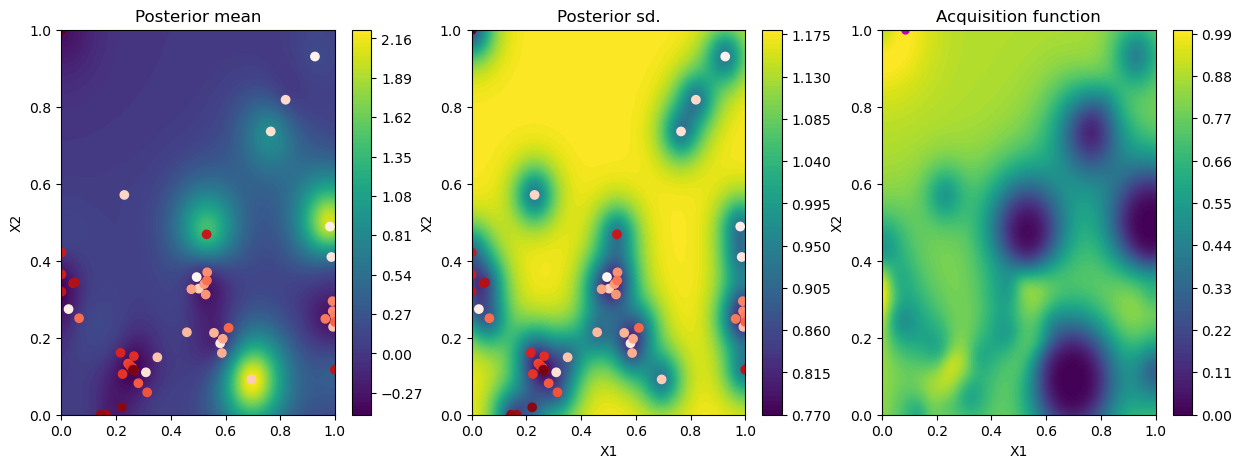

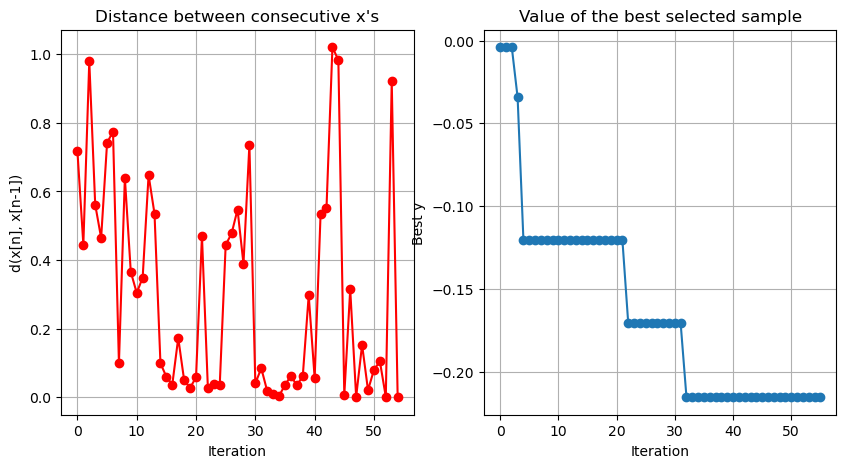

In [24]:
import numpy as np
import GPyOpt
from GPyOpt.methods import BayesianOptimization

# Define the objective function for Bayesian Optimization
def michalewicz_function_with_noise_reshape(x):
    m = 10
    x1, x2 = x[:, 0] * np.pi, x[:, 1] * np.pi
    term1 = np.sin(x1) * (np.sin(x1 ** 2 / np.pi)) ** (2 * m)
    term2 = np.sin(x2) * (np.sin(2 * x2 ** 2 / np.pi)) ** (2 * m)
    noise = np.random.normal(0, 0.1, x.shape[0])
    # GPyOpt minimizes the function, so return the negative of your objective
    return (-(term1 + term2 + noise) * 0.75).reshape(-1, 1)  # Ensure it returns a 2D array

# Define the domain for x1 and x2
domain = [{'name': 'var_1', 'type': 'continuous', 'domain': (0, 1)},
          {'name': 'var_2', 'type': 'continuous', 'domain': (0, 1)}]

# Bayesian Optimization setup with modified parameters for better exploration
optimizer = BayesianOptimization(f=michalewicz_function_with_noise_reshape, 
                                 domain=domain, 
                                 model_type='GP',
                                 acquisition_type='EI', 
                                 acquisition_jitter=0.1,  # Increased jitter for more exploration
                                 exact_feval=False, 
                                 maximize=True,
                                 initial_design_numdata=15)  # More initial points

# Run optimization with more iterations
max_iter = 200  # Increased number of iterations
max_time = 600  # Maximum time in seconds for the optimization

optimizer.run_optimization(max_iter, max_time)

# Print the optimal parameters found and the corresponding value of the function
print("Optimal parameters:", optimizer.x_opt)
print("Optimal function value:", optimizer.fx_opt)

# Visualization
optimizer.plot_acquisition()
optimizer.plot_convergence()




In [46]:
import numpy as np

# Generate grid for the search space
x1_range = np.linspace(0.9, 1, 10000)  # 100 points between 0.4 and 0.8 for x1
x2_range = np.linspace(0.49, 0.51, 10000)  # 100 points between 0.4 and 0.8 for x2
X1, X2 = np.meshgrid(x1_range, x2_range)  # Create a mesh grid
search_space = np.c_[X1.ravel(), X2.ravel()]  # Convert the mesh grid to a list of points

# Evaluate the function at each point in the grid
function_values = np.array([michalewicz_function(point) for point in search_space])

# Find the point with the maximum (optimal) function value
opt_index = np.argmax(function_values)
opt_point = search_space[opt_index]
opt_value = function_values[opt_index]

print(f"Optimal point: [{opt_point[0]:.6f}, {opt_point[1]:.6f}]")
print(f"Function value at the optimal point: {opt_value:.6f}")



Optimal point: [0.970267, 0.510000]
Function value at the optimal point: -0.720021


In [47]:
import numpy as np

# Generate grid for the search space
x1_range = np.linspace(0.65, 0.75, 10000)  # 100 points between 0.4 and 0.8 for x1
x2_range = np.linspace(0.09, 0.12, 10000)  # 100 points between 0.4 and 0.8 for x2
X1, X2 = np.meshgrid(x1_range, x2_range)  # Create a mesh grid
search_space = np.c_[X1.ravel(), X2.ravel()]  # Convert the mesh grid to a list of points

# Evaluate the function at each point in the grid
function_values = np.array([michalewicz_function(point) for point in search_space])

# Find the point with the maximum (optimal) function value
opt_index = np.argmax(function_values)
opt_point = search_space[opt_index]
opt_value = function_values[opt_index]

print(f"Optimal point: [{opt_point[0]:.6f}, {opt_point[1]:.6f}]")
print(f"Function value at the optimal point: {opt_value:.6f}")


Optimal point: [0.750000, 0.090000]
Function value at the optimal point: -0.359770


In [65]:
import numpy as np
import time


# Generate grid for the search space
x1_range = np.linspace(0.701, 0.709, 10000)  # 100 points between 0.4 and 0.8 for x1
x2_range = np.linspace(0.49, 0.501, 10000)  # 100 points between 0.4 and 0.8 for x2
X1, X2 = np.meshgrid(x1_range, x2_range)  # Create a mesh grid
search_space = np.c_[X1.ravel(), X2.ravel()]  # Convert the mesh grid to a list of points

# Timing the evaluation of the function over the entire search space
start_time = time.time()  # Start the timer

# Evaluate the function at each point in the grid
function_values = np.array([michalewicz_function(point) for point in search_space])

# Find the point with the maximum (optimal) function value
opt_index = np.argmax(function_values)
opt_point = search_space[opt_index]
opt_value = function_values[opt_index]

execution_time_full_search = time.time() - start_time  # Total execution time

opt_point, opt_value, execution_time_full_search


(array([0.709, 0.49 ]), -1.3147967868653998, 594.9207053184509)

In [67]:
from scipy.optimize import differential_evolution
import numpy as np

# Define the Michalewicz function for optimization
def michalewicz_function(x):
    m = 10
    x1, x2 = x
    x1 = x1 * np.pi
    x2 = x2 * np.pi
    term1 = np.sin(x1) * (np.sin((x1**2) / np.pi))**(2 * m)
    term2 = np.sin(x2) * (np.sin((2 * x2**2) / np.pi))**(2 * m)
    return -(term1 + term2) * 0.75  # Negate for maximization

# Set the bounds for x1 and x2
bounds = [(0, 1), (0, 1)]

# Use differential evolution to find the global optimum
result = differential_evolution(michalewicz_function, bounds)

# Print the results
optimum_point = result.x
optimum_value = result.fun

optimum_point, -optimum_value  # Negate value to correct for maximization


(array([0.70120402, 0.50000002]), 1.3509775567724738)

In [90]:
# Sample inputs for the function
x_samples = [
    [0.5       , 0.5       ],
       [0.70120661, 0.5       ],
       [0.70856593, 0.50295245],
       [0.70030882, 0.50029645],
       [0.70752778, 0.50555026],
       [0.72      , 0.51      ],
       [0.72      , 0.724482  ],
       [0.72      , 0.51      ],
       [0.70120661, 0.49999999],
       [0.69934552, 0.49910534],
       [0.69937559, 0.4987711 ],
       [0.69968659, 0.49869993],
       [0.69970324, 0.49888559],
       [0.25873889, 0.12258231],
       [0.970267  , 0.51      ],
       [0.75      , 0.09      ],
       [0.709     , 0.49      ],
       [0.69263693, 0.4959378 ],
       [0.5       , 0.50005   ],
       [0.70120661, 0.50005   ],
       [0.70272663, 0.49696603],
       [0.70061662, 0.49838217],
       [0.700162,0.501762]
]

def michalewicz_function(x):
    m = 10
    x1, x2 = x
    x1 = x1 * np.pi
    x2 = x2 * np.pi
    term1 = np.sin(x1) * (np.sin((x1**2) / np.pi))**(2 * m)
    term2 = np.sin(x2) * (np.sin((2 * x2**2) / np.pi))**(2 * m)
    return (term1 + term2) * 0.75  # Negate for maximization

# Loop over the sample inputs and call michalewicz_function for each
for x in x_samples:
    function_value = michalewicz_function(x)
    print(f'Function value for {x}:', function_value + 0.075)


Function value for [0.5, 0.5]: 0.825732421875
Function value for [0.70120661, 0.5]: 1.4259775575739122
Function value for [0.70856593, 0.50295245]: 1.416806763856259
Function value for [0.70030882, 0.50029645]: 1.4258543534666361
Function value for [0.70752778, 0.50555026]: 1.4118670316211912
Function value for [0.72, 0.51]: 1.3539050142420188
Function value for [0.72, 0.724482]: 0.6338838172993515
Function value for [0.72, 0.51]: 1.3539050142420188
Function value for [0.70120661, 0.49999999]: 1.425977557573882
Function value for [0.69934552, 0.49910534]: 1.4253225622008305
Function value for [0.69937559, 0.4987711]: 1.4251238445075836
Function value for [0.69968659, 0.49869993]: 1.4251950014998234
Function value for [0.69970324, 0.49888559]: 1.4253348664765013
Function value for [0.25873889, 0.12258231]: 0.07500000000001347
Function value for [0.970267, 0.51]: 0.7950211969426673
Function value for [0.75, 0.09]: 0.4347700880356528
Function value for [0.709, 0.49]: 1.3897967868653998
Fu

In [39]:
import numpy as np
from scipy.optimize import differential_evolution

# Corrected function definition to accept a single array argument
def michalewicz_function_with_noise(x):
    m=10
    x1, x2 = x  # Unpack the array into x1 and x2
    x1 = x1 * np.pi
    x2 = x2 * np.pi
    
    # Calculate the Michalewicz function components
    term1 = np.sin(x1) * (np.sin(x1 ** 2 / np.pi)) ** (2 * m)
    term2 = np.sin(x2) * (np.sin(2 * x2 ** 2 / np.pi)) ** (2 * m)
    
    # Add noise
    noise = np.random.normal(0, 0.1)
    
    # Return the negated function value (since differential_evolution minimizes)
    return (term1 + term2 + noise) * 0.75

x_samples = [
    [0.5     , 0.5     ],
       [0.701207, 0.5     ],
       [0.705802, 0.682017],
       [0.715917, 0.618141],
       [0.692253, 0.615796],
       [0.711368, 0.505024]
]


# Loop over the sample inputs and call michalewicz_function for each
for x in x_samples:
    function_value = michalewicz_function_with_noise(x)
    print(f'Function value for {x}:', function_value)

Function value for [0.5, 0.5]: 0.8100099231222524
Function value for [0.701207, 0.5]: 1.3584160935773442
Function value for [0.705802, 0.682017]: 0.6652596917722549
Function value for [0.715917, 0.618141]: 0.5738224143357036
Function value for [0.692253, 0.615796]: 0.5841828114025517
Function value for [0.711368, 0.505024]: 1.311893021984928


In [48]:
import numpy as np
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
import joblib

def michalewicz_function_with_noise(x):
    m = 10
    x1, x2 = x[0], x[1]
    term1 = np.sin(x1 * np.pi) * (np.sin(x1 ** 2 / np.pi)) ** (2 * m)
    term2 = np.sin(x2 * np.pi) * (np.sin(2 * x2 ** 2 / np.pi)) ** (2 * m)
    noise = np.random.normal(0, 0.1)
    return ((term1 + term2 + noise) ) * 0.75

# Objective for Bayesian optimization (without noise for acquisition function optimization)
def obj_for_BO(x):
    return michalewicz_function_with_noise(x)  # without noise for acquisition function

# Acquisition function
def acquisition_function(x, model):
    x = np.array(x).reshape(-1, 2)
    mean, std = model.predict(x, return_std=True)
    return -(mean - 1.96 * std)  # Example: EI acquisition function

def optimize_acquisition_function(model):
    bounds = [(0.45, 0.75), (0.45, 0.55)]
    res = minimize(lambda x: acquisition_function(x, model), 
                   x0=[0.5, 0.5], bounds=bounds)
    return res.x

# Bayesian Optimization loop
X_train = np.array([[0.5, 0.5]])  # Initial data point
Y_train = np.array([michalewicz_function_with_noise(X_train[0])])

# Initialize GPR model
kernel = Matern(nu=2.5)
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Bayesian Optimization loop
n_iter = 1000  # Change from 10 to 1000 iterations
for i in range(n_iter):
    model.fit(X_train, Y_train)
    x_next = optimize_acquisition_function(model)
    y_next = michalewicz_function_with_noise(x_next)
    X_train = np.vstack([X_train, x_next])
    Y_train = np.append(Y_train, y_next)

    # Optional: Periodically save the model and data
    if i % 100 == 0:  # Save every 100 iterations
        joblib.dump(model, f'gp_model_{i}.pkl')
        np.savez(f'training_data_{i}.npz', X_train=X_train, Y_train=Y_train)


# Load the model (e.g., for continuation or analysis)
loaded_model = joblib.load('gp_model.pkl')

# Continue with new evaluations (if necessary) using the loaded model
# ...

print("Optimization finished. Model saved as 'gp_model.pkl'.")

# Find the best observed point
best_idx = np.argmax(Y_train)  # Assuming maximisation
best_x = X_train[best_idx]
best_y = Y_train[best_idx]

print(f"Best observed point: {best_x}, Objective value: {best_y}")

# Optionally, perform a dense search over the domain using the trained model
# This is useful if you want to explore the model's belief about the optimum
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
XY = np.vstack([X.ravel(), Y.ravel()]).T

mean_prediction, _ = loaded_model.predict(XY, return_std=True)
best_predicted_idx = np.argmin(mean_prediction)
best_predicted_x = XY[best_predicted_idx]
best_predicted_y = mean_prediction[best_predicted_idx]

print(f"Model's predicted optimum: {best_predicted_x}, Predicted value: {best_predicted_y}")



Optimization finished. Model saved as 'gp_model.pkl'.
Best observed point: [0.5 0.5], Objective value: 0.2030232289694733
Model's predicted optimum: [0. 0.], Predicted value: 0.01370847225189209


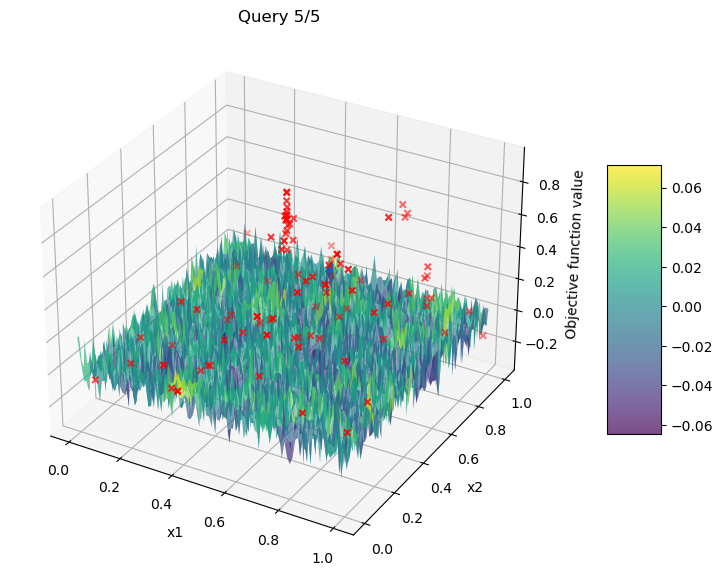

KeyboardInterrupt: Interrupted by user

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module

# Given objective function: Michalewicz function with added noise
def michalewicz_function_with_noise(X):
    m = 10
    term1 = np.sin(X[:, 0] * np.pi) * (np.sin(X[:, 0] ** 2 / np.pi)) ** (2 * m)
    term2 = np.sin(X[:, 1] * np.pi) * (np.sin(2 * X[:, 1] ** 2 / np.pi)) ** (2 * m)
    noise = np.random.normal(0, 0.1, size=X.shape[0])
    return (term1 + term2 + noise) * 0.75


X_i = np.load('initial_data/function_2/initial_inputs.npy')
Y_i = np.load('initial_data/function_2/initial_outputs.npy')
X2 = np.load('initial_data2/function_2/initial_inputs.npy')
Y2 = np.load('initial_data2/function_2/initial_outputs.npy')
X_i = np.vstack((X_i, X2))
Y_i = np.append(Y_i, Y2)

# load w1 data
pd_new = pd.read_csv("data/capstone_results.csv")
pw_fn = pd_new[pd_new['Fn']==2]
X_new_points = pw_fn[['X1','X2']].dropna().values
Y_new_points = pw_fn['Y'].dropna().values
X_updated = np.vstack((X_i, X_new_points))
Y_updated = np.append(Y_i, Y_new_points)



# Problem parameters
real_noise_std = 1e-10
noise_assumption = 1e-10
rbf_lengthscale = 0.1
beta = 1.96

# Define kernel of GP
kernel = RBF(length_scale=rbf_lengthscale, length_scale_bounds='fixed')
model = GaussianProcessRegressor(kernel=kernel, alpha=noise_assumption)

# Initialize query lists with initial data
X = np.array(X_updated)
Y = np.array(Y_updated)
max_obs = max(Y)  # Update the initial maximum observation

# Initialize grid for plots - Adjusting the bounds to [0, 1]
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, 101), np.linspace(0, 1, 101))
x_flat = np.vstack((x_grid.flatten(), y_grid.flatten())).T


num_queries = 5

for i in range(num_queries):
    clear_output(wait=True)
    model = GaussianProcessRegressor(kernel=kernel)
    
    # Ensure X and Y are in the correct shape to fit the model
    model.fit(X, Y.reshape(-1, 1))  # Y reshaped to a 2D column vector if needed
    
    # Predict the mean and standard deviation for the grid
    post_mean, post_std = model.predict(x_flat, return_std=True)
    post_mean = post_mean.reshape(x_grid.shape)
    
    # Create a 3D plot
    fig = plt.figure(figsize=(15, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the surface of the function values
    surf = ax.plot_surface(x_grid, y_grid, function_values, cmap='viridis', alpha=0.7)

    # Add a color bar which maps values to colors
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    # Scatter plot of evaluated points
    ax.scatter(X[:, 0], X[:, 1], Y, c='red', marker='x')  # Plot the actual Y values

    # Select and plot the next point as a prominent blue dot
    if i == 0:
        x_new = np.random.uniform(0, 1, size=2)
    else:
        max_index = np.argmax(acquisition_function)
        x_new = x_flat[max_index]
    
    y_new = michalewicz_function_with_noise(np.array([x_new]))[0]
    X = np.vstack((X, [x_new]))
    Y = np.append(Y, y_new)
    max_obs = max(max_obs, y_new)

    # Plot the next point to be sampled
    ax.scatter(x_new[0], x_new[1], y_new, s=100, c='blue', marker='d', depthshade=True)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Objective function value')
    ax.set_title(f'Query {i+1}/{num_queries}')
    
    plt.show()
    
    input('Press Enter to continue...')

#clear_output()

# Final visualization and results have been adjusted according to the 2D nature of inputs and the function's response, considering the new bounds.



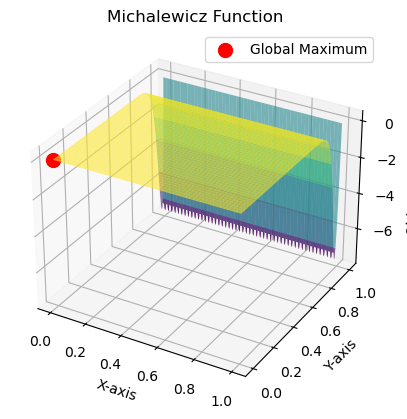

Global maximum at x: 0.0000, y: 0.0000, z: -0.0000


In [63]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def michalewicz_function(X):
    m = 10
    term1 = np.sin(X[:, 0] * np.pi) * (np.sin(X[:, 0] ** 2 / np.pi)) ** (2 * m)
    term2 = np.sin(X[:, 1] * np.pi) * (np.sin(2 * X[:, 1] ** 2 / np.pi)) ** (2 * m)
    return -(term1 + term2)*0.75  # Note the negative sign for maximization

# Load initial dataset
X_i = np.load('initial_data/function_2/initial_inputs.npy')
Y_i = np.load('initial_data/function_2/initial_outputs.npy')
X2 = np.load('initial_data2/function_2/initial_inputs.npy')
Y2 = np.load('initial_data2/function_2/initial_outputs.npy')
X_i = np.vstack((X_i, X2))
Y_i = np.append(Y_i, Y2)

# Load additional data
pd_new = pd.read_csv("data/capstone_results.csv")
pw_fn = pd_new[pd_new['Fn']==2]
X_new_points = pw_fn[['X1','X2']].dropna().values
Y_new_points = pw_fn['Y'].dropna().values
X_i = np.vstack((X_i, X_new_points))
Y_i = np.append(Y_i, Y_new_points)

# Create a dense grid
x = np.linspace(0, 1, 500)
y = np.linspace(0, 1, 500)
x_grid, y_grid = np.meshgrid(x, y)
xy_flat = np.column_stack([x_grid.ravel(), y_grid.ravel()])

# Evaluate the function on the grid
z_values = michalewicz_function(xy_flat).reshape(x_grid.shape)

# Find the global maximum
max_index = np.argmax(z_values)
global_max_x = xy_flat[max_index, 0]
global_max_y = xy_flat[max_index, 1]
global_max_z = z_values.ravel()[max_index]

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_grid, y_grid, z_values, cmap='viridis', alpha=0.6)

# Mark the global maximum
ax.scatter(global_max_x, global_max_y, global_max_z, color='r', s=100, label='Global Maximum')

# Labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Objective Value')
ax.set_title('Michalewicz Function')

# Legend
ax.legend()

plt.show()

print("Global maximum at x: {:.4f}, y: {:.4f}, z: {:.4f}".format(global_max_x, global_max_y, global_max_z))



In [36]:
import numpy as np
from deap import base, creator, tools, algorithms

# Ensure these lines are executed only once to avoid redeclaration errors
if "FitnessMin" not in creator.__dict__:
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
if "Individual" not in creator.__dict__:
    creator.create("Individual", list, fitness=creator.FitnessMin)

# Define the evaluation function for a single individual
def michalewicz_function_with_noise(individual):
    m = 10
    x1, x2 = individual  # Now individual is a one-dimensional list with two elements
    term1 = np.sin(x1 * np.pi) * (np.sin((x1 * np.pi) ** 2 / np.pi)) ** (2 * m)
    term2 = np.sin(x2 * np.pi) * (np.sin((2 * x2 * np.pi) ** 2 / np.pi)) ** (2 * m)
    noise = np.random.normal(0, 0.1)
    return -((term1 + term2) * 0.75 + noise),  # Ensure this is a single-level tuple

# Define the Genetic Algorithm strategy
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", michalewicz_function_with_noise)
toolbox.register("mate", tools.cxUniform, indpb=0.1)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

num_runs = 100  # Number of times to run the genetic algorithm
best_overall_individual = None
best_overall_fitness = float("inf")

for _ in range(num_runs):
    pop = toolbox.population(n=50)  # Generate a new population each run
    result, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, stats=None, halloffame=None, verbose=False)
    best_individual = tools.selBest(result, k=1)[0]
    print("Best individual of run:", best_individual, "With fitness:", best_individual.fitness.values[0])
    
    # Check if the current run's best individual is better than the best overall
    if best_individual.fitness.values[0] < best_overall_fitness:
        best_overall_individual = best_individual
        best_overall_fitness = best_individual.fitness.values[0]

print("\nBest overall individual:", best_overall_individual, "With fitness:", best_overall_fitness)

Best individual of run: [0.6918222118272205, 0.3565149773612568] With fitness: -1.5697340127773347
Best individual of run: [0.6934914813750376, 0.6123594140536914] With fitness: -1.661218455099333
Best individual of run: [0.6975706478004372, 0.6068264125521019] With fitness: -1.4955533856864118
Best individual of run: [0.6966802542310234, 0.6111210159555607] With fitness: -1.5486839032551847
Best individual of run: [2.548085625472223, 0.6101040695389284] With fitness: -1.764743367886634
Best individual of run: [0.7019732001097366, 0.3680608273271493] With fitness: -1.504183365264373
Best individual of run: [0.7032454817690806, 0.31613736052628283] With fitness: -1.081598399162966
Best individual of run: [0.7483385979811195, 0.3532567968109456] With fitness: -1.33152451699233
Best individual of run: [0.6922532468192979, 0.6157962965518434] With fitness: -1.6647361204890287
Best individual of run: [0.6927983649375201, 0.3566610292496327] With fitness: -1.5265534132276612

Best overall in

Best score=-1.6309
Best parameters: [0.7113680119353446, 0.5050235784035974]


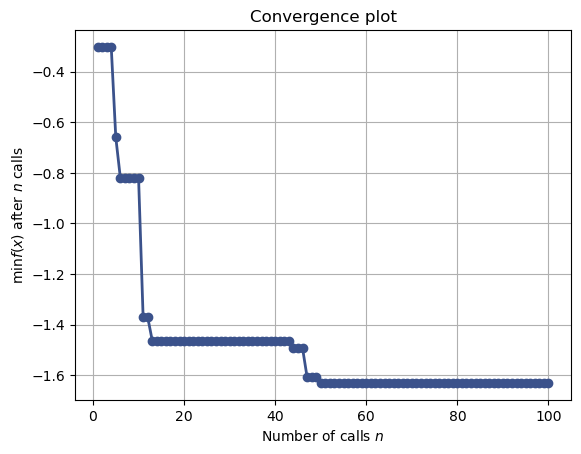

In [38]:
import numpy as np
from skopt import gp_minimize
from skopt.space import Real
from skopt.plots import plot_convergence
import matplotlib.pyplot as plt

# Define the michalewicz function with noise
def michalewicz_function_with_noise(x, m=10):
    x1, x2 = x
    x1 = x1 * np.pi
    x2 = x2 * np.pi
    term1 = np.sin(x1) * (np.sin(x1 ** 2 / np.pi)) ** (2 * m)
    term2 = np.sin(x2) * (np.sin(2 * x2 ** 2 / np.pi)) ** (2 * m)
    noise = np.random.normal(0, 0.1)
    return -((term1 + term2) * 0.75 + noise)  # Negated for minimization in gp_minimize

# Search space definition
space  = [Real(0, 1, name='x1'), Real(0, 1, name='x2')]

# Perform Bayesian optimization using Gaussian Process
res_gp = gp_minimize(michalewicz_function_with_noise, space, n_calls=100, random_state=0)

# Results and visualization
print("Best score=%.4f" % res_gp.fun)
print("Best parameters:", res_gp.x)

# Plot convergence
plot_convergence(res_gp)
plt.show()


# 2024 April 06

In [94]:
from scipy.optimize import differential_evolution
import numpy as np

# Define the Michalewicz function with added noise
def michalewicz_function_with_noise(X):
    m = 10
    term1 = np.sin(X[0] * np.pi) * (np.sin(X[0] ** 2 / np.pi)) ** (2 * m)
    term2 = np.sin(X[1] * np.pi) * (np.sin(2 * X[1] ** 2 / np.pi)) ** (2 * m)
    noise = np.random.normal(0, 0.1)
    return (term1 + term2 + noise) * 0.75  # Negative for minimization

# Set bounds for the variables
bounds = [(0.65, 0.75), (0.45, 0.55)]

# Use Differential Evolution to find the global minimum
result = differential_evolution(michalewicz_function_with_noise, bounds)

result


 message: Maximum number of iterations has been exceeded.
 success: False
     fun: -0.30253124654275215
       x: [ 7.261e-01  4.880e-01]
     nit: 1000
    nfev: 30174

In [96]:
import numpy as np
from scipy.optimize import basinhopping

# Define the Michalewicz function with added noise
def michalewicz_function_with_noise(X):
    m = 10
    term1 = np.sin(X[0] * np.pi) * (np.sin(X[0] ** 2 / np.pi)) ** (2 * m)
    term2 = np.sin(X[1] * np.pi) * (np.sin(2 * X[1] ** 2 / np.pi)) ** (2 * m)
    noise = np.random.normal(0, 0.1)
    return (term1 + term2 + noise) * 0.75  # Negative for minimization
# Define bounds for the search space (adjust as needed)
bounds = [(0, 1), (0, 1)] 

# Number of optimization runs
num_runs = 20 

best_solutions = []
for _ in range(num_runs):
  x0 = np.random.uniform(*bounds[0], size=2)  # Random initial point
  minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bounds} 
  result = basinhopping(michalewicz_function_with_noise, x0, minimizer_kwargs=minimizer_kwargs)
  best_solutions.append(result.x)

# Average the best solutions across runs
averaged_solution = np.mean(best_solutions, axis=0) 
print("Averaged Best Solution:", averaged_solution) 
print("result",result)

Averaged Best Solution: [0.48304484 0.41975571]
result                     message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -0.21768484744868577
                          x: [ 0.000e+00  0.000e+00]
                        nit: 100
      minimization_failures: 25
                       nfev: 6795
                       njev: 2265
 lowest_optimization_result:  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
                              success: True
                               status: 0
                                  fun: -0.21768484744868577
                                    x: [ 0.000e+00  0.000e+00]
                                  nit: 0
                                  jac: [ 1.496e+07  3.625e+07]
                                 nfev: 3
                                 njev: 1
                             hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
